In [1]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import networkx as nx

In [4]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [6]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)
   
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [7]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()

    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [8]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: story3.txt
You have asked for the document story3.txt
1
<class 'str'>
The length of the file is: 4690


In [9]:
sentences_list = tokenize(document)
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 344
The size of the item 0 in Bytes is: 367


In [10]:
print(type(sentences_list))

<class 'list'>


In [11]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 26


In [12]:
for i in sentences_list:
    print(i)

  Donor exits can create shocks to a country's health system affecting 
human resources for health, service delivery, medicines and technologies, 
and health financing especially if both financing and technical support are 
withdrawn.The upcoming graduates appear to have less domestic capacity to handle
 such shocks.
One particular concern is the impact of such a transition on human
 resources for health.
The loss of external support can lead to gaps in staffing and technical capacity, 
weakening the health workforce and reducing the quality of health services [16,17].
Another concern is what happens to the quality and coverage of services delivered 
to vulnerable populations such as prisoners, men who have sex with men, commercial
 sex workers, and injection drug users when donors withdraw support.
Such 
populations are at a higher risk of HIV infection, and prevention and 
treatment programs for these groups are heavily supported by donors 
like the Global Fund.
When donor exits are 

In [13]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [14]:
cv_demo = CountVectorizer()
text_demo = ["Goutham is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0]]
Feature list: ['am', 'are', 'bad', 'good', 'goutham', 'is', 'not', 'you']


In [15]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <26x356 sparse matrix of type '<class 'numpy.int64'>'
	with 620 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['10', '16', '17', '18', '19', '20', '2030', '21', '22', '23', '24', '25', '26', '371', '4ds', 'ababa', 'about', 'accelerated', 'account', 'action', 'addis', 'additional', 'affecting', 'after', 'agencies', 'agenda', 'ahead', 'air', 'all', 'allocate', 'also', 'an', 'and', 'another', 'anticipating', 'antimicrobial', 'appear', 'approach', 'are', 'as', 'assist', 'at', 'base', 'be', 'because', 'become', 'before', 'benefits', 'billion', 'boost', 'both', 'bring', 'budgetary', 'burden', 'but', 'by', 'can', 'cannot', 'capacity', 'care', 'chronic', 'come', 'comes', 'commercial', 'community', 'complex', 'component', 'concern', 'conditions', 'control', 'cost', 'costs', 'could', 'countries', 'country', 'course', 'coverage', 'create', 'curb',

In [16]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2400366  0.21302165 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [17]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <356x26 sparse matrix of type '<class 'numpy.float64'>'
	with 620 stored elements in Compressed Sparse Column format>>


/home/goutham/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Number of edges 314
Number of vertices 26


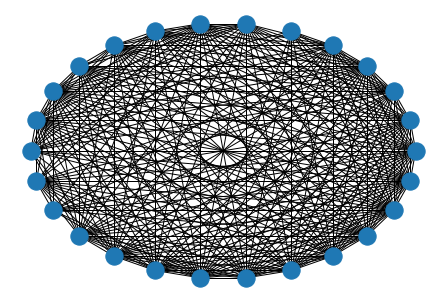

The memory used by the graph in Bytes is: 56


In [18]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [19]:
ranks = nx.pagerank(nx_graph)
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 1184
0 0.04728990582222432
1 0.040466764172989646
2 0.04599944459494297
3 0.039071455797667055
4 0.039326122602634614
5 0.02920471127281726
6 0.04103896190302626
7 0.038565601552342746
8 0.03148377820435344
9 0.03353131330047237
10 0.029124140321561548
11 0.0424915586060884
12 0.04261473878269958
13 0.028523358345298483
14 0.03720796493442315
15 0.02841036442856509
16 0.03878540080844102
17 0.036662377418951446
18 0.04291917904881489
19 0.044770313846590123
20 0.037570582108774474
21 0.03515053658631601
22 0.04135551991984642
23 0.03887380942366619
24 0.04358314978567249
25 0.04597894641082005


In [20]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [21]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [22]:
print(rank_max)
print(rank_min)

0.04728990582222432
0.02841036442856509


In [23]:
temp_array = []
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

26


In [24]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [25]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [26]:
model = sentence_list

In [27]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('final3.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

  Donor exits can create shocks to a country's health system affecting 
human resources for health, service delivery, medicines and technologies, 
and health financing especially if both financing and technical support are 
withdrawn.The upcoming graduates appear to have less domestic capacity to handle
 such shocks. The loss of external support can lead to gaps in staffing and technical capacity, 
weakening the health workforce and reducing the quality of health services [16,17]. By anticipating 
the disease and demographic trends ahead and what these mean for future 
financing needs, mobilizing the required resources to fund the right
 health benefits packages, and supporting intersectoral policies for
 health improvement (e.g., policies to curb indoor air pollution and 
road traffic injuries) [26], MICs could see a health transformation
 in the SDGs era Governments of MICs can draw on an expanding evidence base on how to 
raise revenues for health through tax reform and to allocate 

<function TextIOWrapper.close()>

In [28]:
for lines in sentence_list:
    print(lines)

  Donor exits can create shocks to a country's health system affecting 
human resources for health, service delivery, medicines and technologies, 
and health financing especially if both financing and technical support are 
withdrawn.The upcoming graduates appear to have less domestic capacity to handle
 such shocks.
The loss of external support can lead to gaps in staffing and technical capacity, 
weakening the health workforce and reducing the quality of health services [16,17].
By anticipating 
the disease and demographic trends ahead and what these mean for future 
financing needs, mobilizing the required resources to fund the right
 health benefits packages, and supporting intersectoral policies for
 health improvement (e.g., policies to curb indoor air pollution and 
road traffic injuries) [26], MICs could see a health transformation
 in the SDGs era
Governments of MICs can draw on an expanding evidence base on how to 
raise revenues for health through tax reform and to allocate 

In [29]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from pythonrouge.pythonrouge import Pythonrouge
from pprint import pprint

if __name__ == '__main__':
    summary = './sample/summary/'
    reference = './sample/reference/'
    print('evaluate sumamry & reference in these dirs')
    print('summary:\t{}\nreference:\t{}'.format(summary, reference))
    rouge = Pythonrouge(summary_file_exist=True,
                        peer_path=summary, model_path=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=False, f_measure_only=False,
                        stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall & f-measure with confidence interval')
    pprint(score)
    print('Evaluate ROUGE based on sentecnce lists')
    """
    ROUGE evaluates all system summaries and its corresponding reference
    a summary or summaries at onece.
    Summary should be double list, in each list has each summary.
    Reference summaries should be triple list because some of reference
    has multiple gold summaries.
    """
    summary = [["Donor exits can create shocks to a country's health system affecting ",
                "The loss of external support can lead to gaps in staffing and technical capacity",
                "Governments of MICs can draw on an expanding evidence base on how to raise "],
               ["The second component of a joined-up approach would be a health financing ",
                "MICs need a joined-up approach to transition"]]
    reference = [
                 [["Donor exits can create shocks to a country's health system affecting \
human resources for health, service delivery, medicines and technologies"],
                  ["A fourth, related transition is the new focus within the global health community on domestic resource mobilization for health "],
                  ["Yet many countries have so far seen little or no mobilization of domestic resources",
                  "To give one example, Ghana, which is currently \
in Gavis preparatory transition phase"]],
                 [["The second component of a joined-up approach \
would be a health financing revolutioninvolving sustained domestic",
                   "Finally, the international community can support transitioning MICs \
through providing global public goods for health"],
                  ["other health technologies, and (iii) tackling\
 global antimicrobial resistance",
                   "MICs themselves should, of course, be in the driving seat \
when it comes to leading such strategy development",
                   "By anticipating the disease and demographic trends ahead and what these mean for future \
                   financing needs"],
                  [" mobilizing the required resources to fund the right health benefits packages,",
                  "supporting intersectoral policies for health improvement"],
                  ["MICs could see a health transformation in the SDGs era",
                  "international community can support transitioning MICs through providing global public goods for health"]]
                  ]
    rouge = Pythonrouge(summary_file_exist=False,
                        summary=summary, reference=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=True, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall only with confidence interval')
    pprint(score)

evaluate sumamry & reference in these dirs
summary:	./sample/summary/
reference:	./sample/reference/
ROUGE-N(1-2) & SU4 recall & f-measure with confidence interval
{}
Evaluate ROUGE based on sentecnce lists
ROUGE-N(1-2) & SU4 recall only with confidence interval
{'ROUGE-1': 0.24495,
 'ROUGE-1-cf95': (0.21212, 0.27778),
 'ROUGE-2': 0.13832,
 'ROUGE-2-cf95': (0.06452, 0.21212),
 'ROUGE-SU4': 0.13579,
 'ROUGE-SU4-cf95': (0.06325, 0.20833)}
